In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("EastWestAirlinesCluster-updated.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


<AxesSubplot: xlabel='Qual_miles', ylabel='Count'>

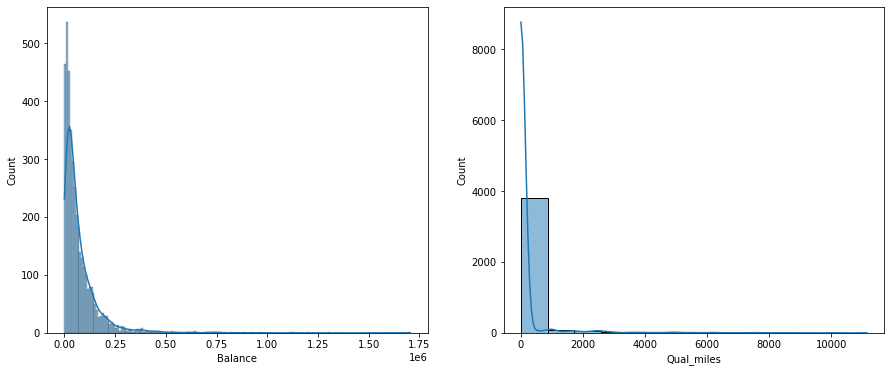

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.histplot(data=df,x="Balance", kde=True,  ax=axes[0])
sns.histplot(data=df,x="Qual_miles", kde=True,  ax=axes[1])

Text(0.5, 0, 'miles earned with Small Business credit card')

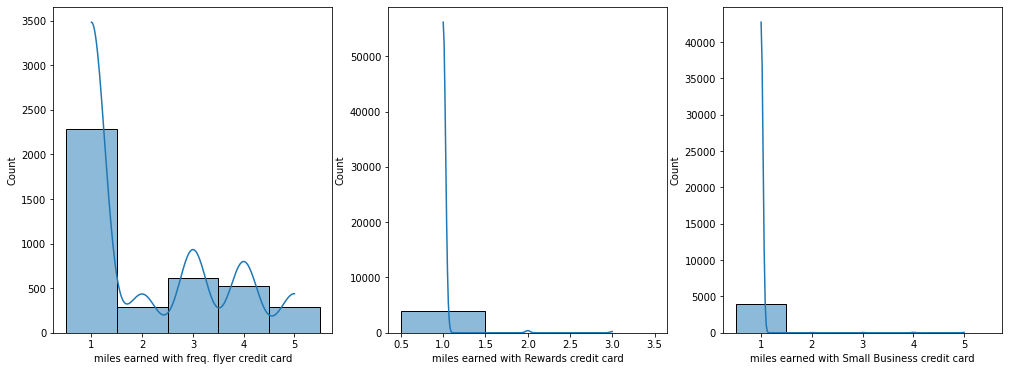

In [4]:
df["cc1_miles"]=df["cc1_miles"].astype("category")
df["cc2_miles"]=df["cc2_miles"].astype("category")
df["cc3_miles"]=df["cc3_miles"].astype("category")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 6))
sns.histplot(data=df,x="cc1_miles", kde=True,  ax=axes[0])
sns.histplot(data=df,x="cc2_miles", kde=True,  ax=axes[1])
sns.histplot(data=df,x="cc3_miles", kde=True,  ax=axes[2])
axes[0].set_xlabel('miles earned with freq. flyer credit card')
axes[1].set_xlabel('miles earned with Rewards credit card')
axes[2].set_xlabel('miles earned with Small Business credit card')

<AxesSubplot: xlabel='Bonus_miles', ylabel='Count'>

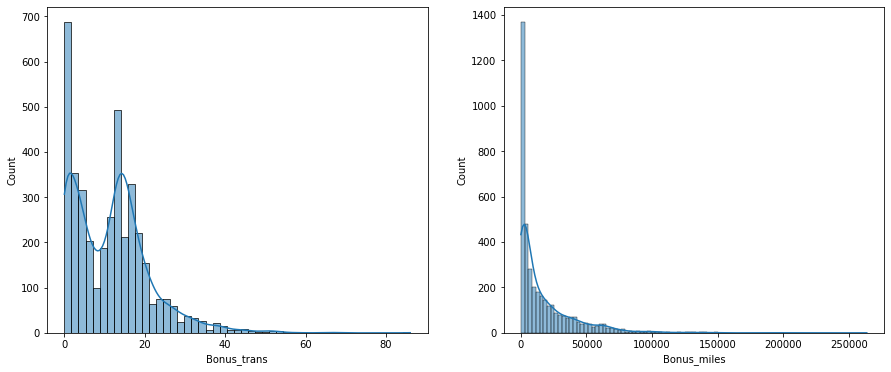

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.histplot(data=df,x="Bonus_trans", kde=True,  ax=axes[0])
sns.histplot(data=df,x="Bonus_miles", kde=True,  ax=axes[1])
#sns.histplot(data=df,x="cc1_miles", kde=True,  ax=axes[2])

<AxesSubplot: xlabel='Flight_miles_12mo', ylabel='Count'>

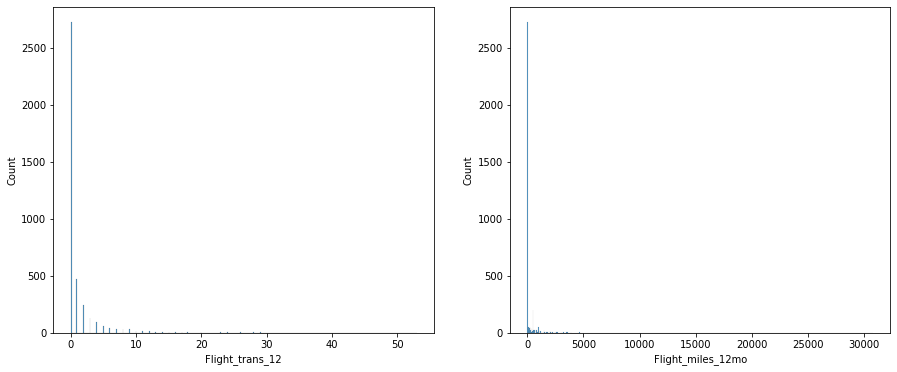

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.histplot(data=df,x="Flight_trans_12", ax=axes[0])
sns.histplot(data=df,x="Flight_miles_12mo",  ax=axes[1])
#sns.histplot(data=df,x="cc1_miles", kde=True,  ax=axes[2])

<AxesSubplot: xlabel='Award?', ylabel='Count'>

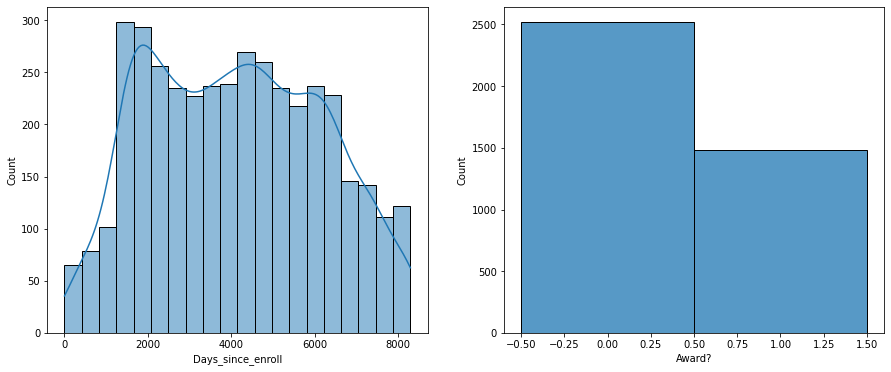

In [7]:
df["Award?"]=df["Award?"].astype("category")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.histplot(data=df,x="Days_since_enroll", kde=True,  ax=axes[0])
sns.histplot(data=df,x="Award?",  ax=axes[1])


## a. Do you need to standardize the data before applying any clustering technique? Why or why not?

Do we need to standardize the data or not will depend on what kind of distance we will be calculating to cluster the data. If we are using Euclidean Distance, than there is a need to standardize the data, as this distance is highly influenced by the scale of the variables, and also with presence of outliers in data.

## b. Apply hierarchical clustering with Euclidean distance and Ward’s method. How many clusters do appear?

In [8]:
df_data=pd.read_csv("EastWestAirlinesCluster-updated.csv")
cols=["Balance","Qual_miles","cc1_miles",
      "cc2_miles","cc3_miles","Bonus_miles","Bonus_trans",
      "Flight_miles_12mo","Flight_trans_12"]
df=df_data[cols]
df_norm = (df - df.mean())/df.std()
df_norm.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12
count,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03
mean,2.842882e-17,3.731282e-17,1.137153e-16,2.505289e-16,1.066081e-16,-2.842882e-17,-5.685763e-17,-1.776801e-18,2.132161e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.303482e-01,-1.862754e-01,-7.694822e-01,-9.822960e-02,-6.275873e-02,-7.099031e-01,-1.208052e+00,-3.285622e-01,-3.621226e-01
25%,-5.464993e-01,-1.862754e-01,-7.694822e-01,-9.822960e-02,-6.275873e-02,-6.581453e-01,-8.956758e-01,-3.285622e-01,-3.621226e-01
50%,-3.026954e-01,-1.862754e-01,-7.694822e-01,-9.822960e-02,-6.275873e-02,-4.129792e-01,4.145225e-02,-3.285622e-01,-3.621226e-01
75%,1.865795e-01,-1.862754e-01,6.830357e-01,-9.822960e-02,-6.275873e-02,2.755854e-01,5.620789e-01,-1.064525e-01,-9.849101e-02
max,1.618681e+01,1.422308e+01,2.135554e+00,1.344729e+01,2.042477e+01,1.020829e+01,7.746727e+00,2.168029e+01,1.361035e+01


Since the mean and standard deviation for all the variables are now 0 and 1 respectively, so it is verified that the data is properly normalized

In [9]:
df.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000


Most of the variables are not highly correlated, which is a good thing since we will be using euclidean distance. <ul><li>cc1_miles is correlated with bonus_miles </li><li> Flight_trans_12 is correlated with Flight_miles_12mo</li></ul>

In [10]:
d_norm = pairwise.pairwise_distances(df_norm, metric='euclidean')
pd.DataFrame(d_norm, columns=df.index, index=df.index)

,0,1,2,3,4,5,6,7,8,9,...,3989,3990,3991,3992,3993,3994,3995,3996,3997,3998
0,0.000000,0.136538,0.376166,0.133326,4.301337,0.156289,3.154478,0.498359,10.080935,3.641665,...,0.582061,0.281107,3.225135,1.158102,0.317725,0.562361,0.551293,1.984839,0.517385,0.270301
1,0.136538,0.000000,0.343057,0.113785,4.253701,0.210316,3.089435,0.434129,10.072735,3.581252,...,0.451760,0.214006,3.138767,1.044741,0.183958,0.501722,0.547020,1.970417,0.577213,0.263398
2,0.376166,0.343057,0.000000,0.435476,4.031330,0.513649,2.830812,0.380697,9.896153,3.326357,...,0.449203,0.365556,2.925314,0.895002,0.415498,0.417928,0.282837,1.779113,0.578933,0.589359
3,0.133326,0.113785,0.435476,0.000000,4.319064,0.107410,3.176071,0.491204,10.135746,3.667406,...,0.536440,0.216951,3.229810,1.146072,0.234284,0.547032,0.645137,2.012154,0.596265,0.157761
4,4.301337,4.253701,4.031330,4.319064,0.000000,4.387991,2.072644,3.922642,8.383261,1.209505,...,4.032996,4.189560,2.365664,3.741715,4.221530,3.887065,4.002606,2.820735,4.091309,4.414391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.562361,0.501722,0.417928,0.547032,3.887065,0.623212,2.834048,0.142203,9.874227,3.241446,...,0.489538,0.399223,2.925451,0.942317,0.485400,0.000000,0.637065,1.778568,0.620101,0.641492
3995,0.551293,0.547020,0.282837,0.645137,4.002606,0.706568,2.773485,0.574490,9.763243,3.255462,...,0.622230,0.634774,2.871246,0.899996,0.635115,0.637065,0.000000,1.800556,0.616235,0.802211
3996,1.984839,1.970417,1.779113,2.012154,2.820735,2.058110,1.775690,1.832464,9.545662,2.397571,...,1.903192,1.896696,2.154420,1.922891,1.984125,1.778568,1.800556,0.000000,1.984822,2.098675
3997,0.517385,0.577213,0.578933,0.596265,4.091309,0.595045,3.144640,0.531277,9.801708,3.477072,...,0.859845,0.655733,3.254946,1.302850,0.704111,0.620101,0.616235,1.984822,0.000000,0.687999


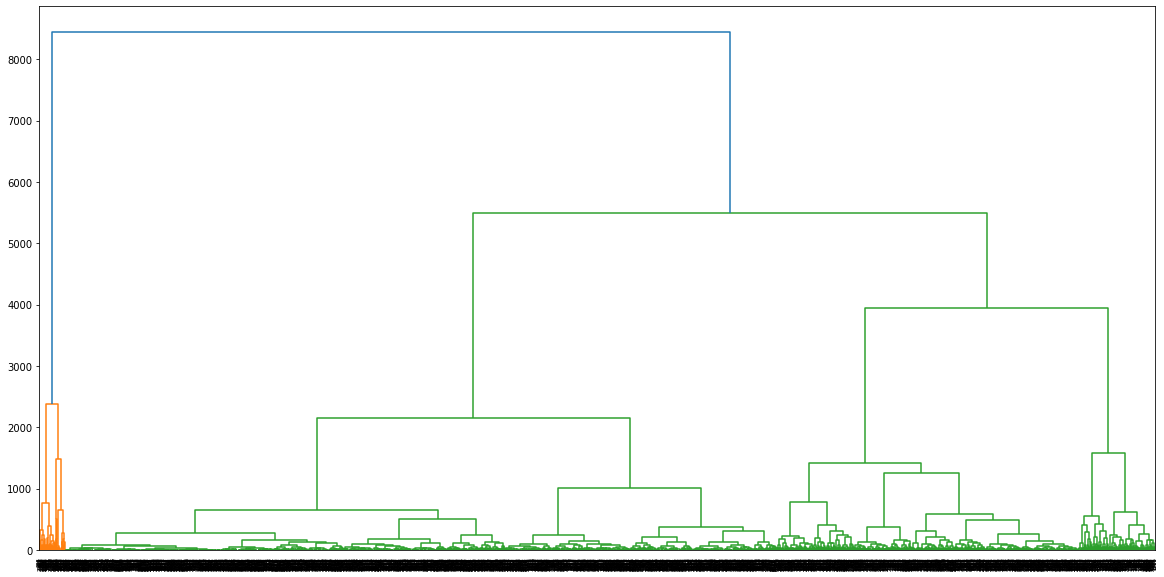

In [11]:
Z = linkage(d_norm, method='ward')
plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.show()

 After applying hierarchical clustering with Euclidean distance and Ward’s method, As visible from the dendogram there are 4 clusters

In [12]:
memb = fcluster(Z, 4, criterion='maxclust')
memb = pd.Series(memb, index=df_norm.index)
clus={}
for key, item in memb.groupby(memb):
    clus[key]=item.index
    print(key, ': ', item.index)

1 :  Int64Index([   8,   65,  106,  117,  126,  135,  151,  190,  198,  220,  275,
             335,  380,  381,  384,  420,  466,  471,  475,  481,  488,  510,
             531,  534,  589,  622,  630,  662,  702,  833,  850,  896,  901,
             904,  940,  958, 1036, 1177, 1220, 1244, 1270, 1300, 1337, 1489,
            1529, 1545, 1593, 1676, 1791, 1878, 1885, 1917, 1918, 1946, 2015,
            2047, 2058, 2142, 2151, 2166, 2217, 2251, 2278, 2283, 2364, 2375,
            2413, 2436, 2605, 2656, 2696, 2709, 2789, 2955, 2978, 2999, 3203,
            3235, 3332, 3338, 3367, 3429, 3463, 3489, 3583, 3594, 3611, 3772,
            3779, 3788, 3846],
           dtype='int64')
2 :  Int64Index([   0,    1,    2,    3,    5,    7,   10,   12,   13,   14,
            ...
            3988, 3989, 3990, 3992, 3993, 3994, 3995, 3996, 3997, 3998],
           dtype='int64', length=2551)
3 :  Int64Index([   4,    6,    9,   11,   15,   16,   20,   21,   22,   24,
            ...
            3908

## c. Compare cluster centroids to characterize different clusters and try to give each cluster a label—ameaningful name that characterizes the cluster.

### Cluster 1 - Very Frequent Flyers

In [13]:
df_desc=df_data.loc[clus[1]].describe()
df_desc

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,91.000000,9.100000e+01,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,1674.186813,2.523860e+05,1819.681319,2.538462,1.351648,1.505495,55583.153846,28.076923,4309.582418,12.087912,4836.989011,0.758242
std,1177.512717,3.371759e+05,3108.348393,1.727604,0.750905,1.186719,59659.026802,15.454759,5556.306027,13.391248,2071.548211,0.430521
min,9.000000,4.148000e+03,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,676.000000,0.000000
25%,538.500000,5.172150e+04,0.000000,1.000000,1.000000,1.000000,14769.500000,16.000000,25.000000,0.500000,3417.500000,1.000000
50%,1560.000000,1.266800e+05,0.000000,1.000000,1.000000,1.000000,26334.000000,27.000000,2000.000000,6.000000,4848.000000,1.000000
75%,2539.500000,2.670900e+05,2040.500000,4.000000,1.000000,1.000000,82211.000000,37.000000,7086.000000,23.000000,6602.500000,1.000000
max,3869.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


<b>observations</b>: These are  most frequent flyers in the data.

### Cluster 2 - Sparse flyers

In [14]:
df_desc=df_data.loc[clus[2]].describe()
df_desc

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,2551.000000,2551.000000,2551.000000,2551.000000,2551.0,2551.0,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000
mean,2182.900823,40037.058016,7.591533,1.440220,1.0,1.0,6152.259506,7.341043,95.677381,0.335163,3797.366915,0.246178
std,1153.275412,36956.549056,78.949004,0.772222,0.0,0.0,7735.942030,6.352128,249.519272,0.816601,2046.045729,0.430868
min,1.000000,50.000000,0.000000,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1210.500000,13166.000000,0.000000,1.000000,1.0,1.0,375.000000,1.000000,0.000000,0.000000,2037.500000,0.000000
50%,2257.000000,28306.000000,0.000000,1.000000,1.0,1.0,2719.000000,5.000000,0.000000,0.000000,3645.000000,0.000000
75%,3204.000000,55532.000000,0.000000,2.000000,1.0,1.0,9523.500000,13.000000,0.000000,0.000000,5385.500000,0.000000
max,4021.000000,220267.000000,1112.000000,3.000000,1.0,1.0,49364.000000,25.000000,1816.000000,5.000000,8296.000000,1.000000


<b>Observation</b>: These group of people have taken very few flight in last 12 months and the credit card usage for non-flight bonus transactions is very less.

### Cluster 3 - Occasional Flyers

In [15]:
df_desc=df_data.loc[clus[3]].describe()
df_desc

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,1076.000000,1076.000000,1076.000000,1076.000000,1076.0,1076.0,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000
mean,1725.156134,107286.964684,131.538104,3.243494,1.0,1.0,32365.740706,17.432156,570.051115,1.605019,4663.217472,0.552974
std,1099.829363,80707.654073,490.630910,1.421498,0.0,0.0,20724.978732,7.729620,942.908439,2.493365,1944.005017,0.497417
min,5.000000,0.000000,0.000000,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,429.000000,0.000000
25%,778.000000,47595.000000,0.000000,2.000000,1.0,1.0,13647.250000,13.000000,0.000000,0.000000,3119.000000,0.000000
50%,1666.500000,86440.000000,0.000000,4.000000,1.0,1.0,32410.500000,16.000000,0.000000,0.000000,4700.000000,1.000000
75%,2560.500000,149290.000000,0.000000,4.000000,1.0,1.0,46207.500000,21.000000,731.250000,2.000000,6194.000000,1.000000
max,4014.000000,456509.000000,3071.000000,5.000000,1.0,1.0,95082.000000,50.000000,5446.000000,12.000000,8296.000000,1.000000


<b>Observation</b>: These group of people fly quite often and the credit card usage for non-flight bonus transactions is high.

### Cluster 4: Frequent Flyers

In [16]:
df_desc=df_data.loc[clus[4]].describe()
df_desc

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,1708.412811,191420.900356,889.046263,2.992883,1.092527,1.010676,46207.195730,22.622776,2100.153025,6.444840,4716.185053,0.672598
std,1150.717450,179100.014026,1679.348441,1.758638,0.290285,0.102956,40879.177734,11.712938,2306.258375,6.686713,2067.615238,0.470103
min,44.000000,231.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
25%,707.000000,56606.000000,0.000000,1.000000,1.000000,1.000000,10348.000000,14.000000,100.000000,1.000000,2927.000000,0.000000
50%,1518.000000,130920.000000,0.000000,3.000000,1.000000,1.000000,34282.000000,20.000000,1200.000000,4.000000,4916.000000,1.000000
75%,2694.000000,286101.000000,1000.000000,5.000000,1.000000,1.000000,73679.000000,30.000000,3400.000000,11.000000,6311.000000,1.000000
max,3982.000000,837979.000000,6396.000000,5.000000,2.000000,2.000000,200622.000000,65.000000,10042.000000,29.000000,8296.000000,1.000000


<b>Observation</b>: These are frequent flyers, but not as frequent as cluster 1.

## d. To check the stability of clusters, remove a random 5% of the data (by taking a random sample of 95% of the records), and repeat the analysis. Does the same picture emerge?

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X=df_data
labels=df_data["Award?"]
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.05, random_state=50)

In [19]:
X_train.shape

(3799, 12)

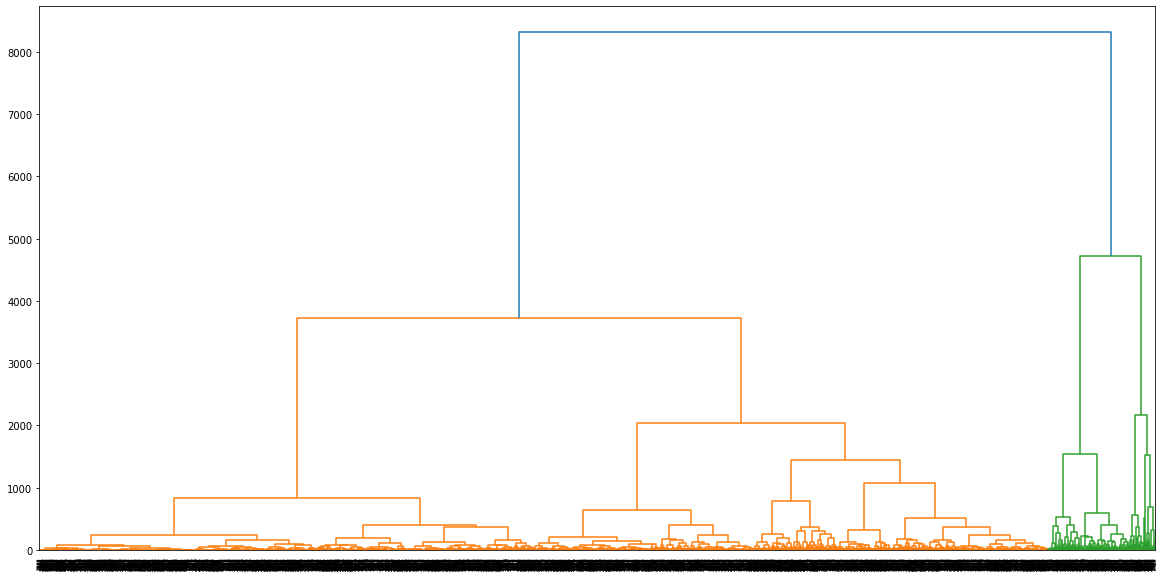

In [20]:
df=X_train[cols]
df_norm = (df - df.mean())/df.std()
#df_norm.describe()
d_norm = pairwise.pairwise_distances(df_norm, metric='euclidean')
#pd.DataFrame(d_norm, columns=df.index, index=df.index)
Z = linkage(d_norm, method='ward')
plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.show()

The color has reversed and the position of clusters has also changed, but essentially for all practical puposes, both the dendograms are same

## e. Cluster all passengers again using k-means clustering. How many clusters do you want to go with? How did you decide on the number of clusters? Explain your choice on the number of clusters.

In [21]:
df_data=pd.read_csv("EastWestAirlinesCluster-updated.csv")
df=df_data[cols]
df_norm = (df - df.mean())/df.std()

To find the optimum number of clusters lets plot an elbow graph. It will help in deciding the number of clusters.

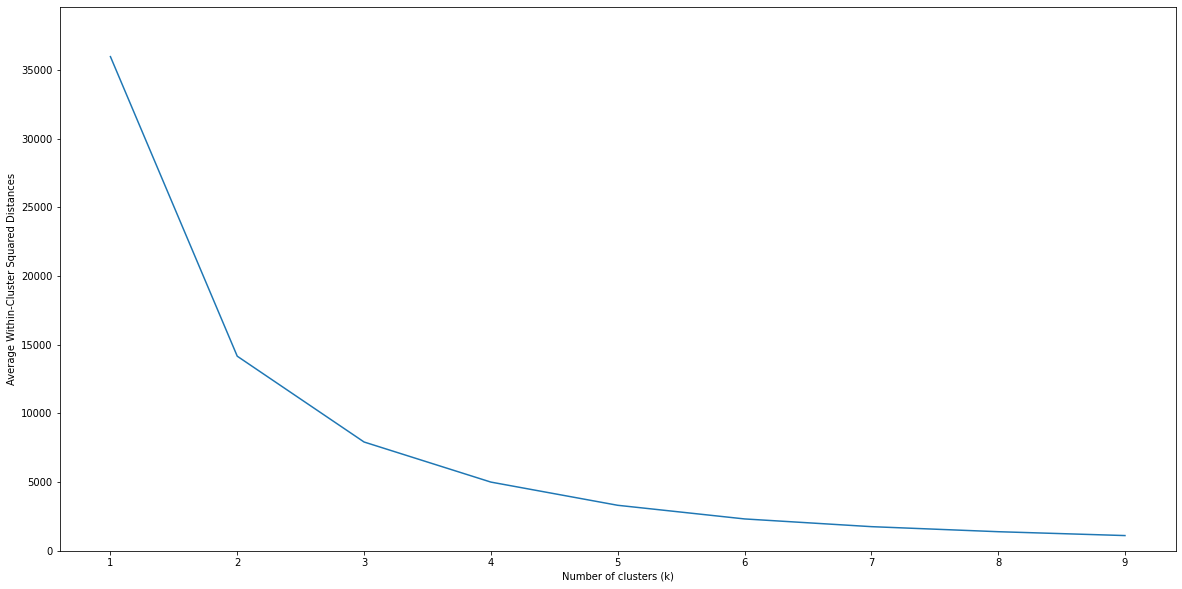

In [22]:
inertia=[]
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 10), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia', figsize=(20, 10))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [23]:
pd.DataFrame(pairwise.pairwise_distances(
    kmeans.cluster_centers_, metric='euclidean'))

,0,1,2,3,4,5,6,7,8
0,0.000000,3.570949,9.275285,9.907320,16.473379,7.313132,1.758810,3.626606,6.949732
1,3.570949,0.000000,9.557995,9.190093,15.835041,7.457584,2.072027,3.845300,4.833148
2,9.275285,9.557995,0.000000,12.755057,18.587538,11.636571,9.204302,9.520128,10.970020
3,9.907320,9.190093,12.755057,0.000000,18.113637,10.786904,9.423258,6.312335,8.877571
4,16.473379,15.835041,18.587538,18.113637,0.000000,17.612785,16.123679,16.357396,16.326024
5,7.313132,7.457584,11.636571,10.786904,17.612785,0.000000,7.197320,7.291903,8.775409
6,1.758810,2.072027,9.204302,9.423258,16.123679,7.197320,0.000000,3.280010,5.945336
7,3.626606,3.845300,9.520128,6.312335,16.357396,7.291903,3.280010,0.000000,5.773223
8,6.949732,4.833148,10.970020,8.877571,16.326024,8.775409,5.945336,5.773223,0.000000


Looking at the elbow graph and the pairwise distance table above, it looks like that 4 custers are optimum and we will go ahead with 4 clusters to do KNN clustering. <br>If you look at the pairwise distance table, then you will find that the distance is increasing till 4 clusters and then starts decreasing, which means that it is the pivotal point and the data can be clustered into that many clusters.

In [24]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_norm)
# Cluster membership
memb = pd.Series(kmeans.labels_, index=df_norm.index)

clus={}
for key, item in memb.groupby(memb):
    clus[key]=item.index
    print(key, ': ', item.index)

0 :  Int64Index([   0,    1,    2,    3,    5,    7,   10,   12,   13,   14,
            ...
            3987, 3988, 3989, 3990, 3992, 3993, 3994, 3995, 3997, 3998],
           dtype='int64', length=2446)
1 :  Int64Index([ 106,  384,  850,  904, 1036, 1244, 1300, 1878, 1917, 1946, 2251,
            2283, 2364, 2955, 3338],
           dtype='int64')
2 :  Int64Index([   4,    6,    9,   11,   15,   16,   18,   20,   28,   30,
            ...
            3954, 3966, 3967, 3973, 3974, 3979, 3980, 3985, 3991, 3996],
           dtype='int64', length=1379)
3 :  Int64Index([   8,   42,   50,   65,   94,  112,  126,  127,  135,  186,
            ...
            3788, 3806, 3824, 3832, 3846, 3907, 3911, 3917, 3934, 3950],
           dtype='int64', length=159)


## f. How do the characteristics of the clusters, obtained in Part (e), contrast or validate the finding in Part c above?

### Cluster 1 - Sparse Flyers
These are similar to Cluster 2 of Question c

In [25]:
df_desc=df_data.loc[clus[0]].describe()
df_desc

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,2446.000000,2446.000000,2446.000000,2446.000000,2446.000000,2446.000000,2446.000000,2446.000000,2446.000000,2446.000000,2446.000000,2446.000000
mean,2188.155356,43277.782502,104.647997,1.129599,1.020033,1.000409,4059.006541,6.549469,220.927637,0.677024,3791.485691,0.237939
std,1163.933975,52060.341277,654.813033,0.380462,0.173992,0.020220,5243.283600,6.365022,593.276438,1.599444,2076.868231,0.425909
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1232.000000,12253.250000,0.000000,1.000000,1.000000,1.000000,269.250000,1.000000,0.000000,0.000000,1990.500000,0.000000
50%,2244.500000,25873.500000,0.000000,1.000000,1.000000,1.000000,2142.500000,4.000000,0.000000,0.000000,3656.500000,0.000000
75%,3236.250000,52665.750000,0.000000,1.000000,1.000000,1.000000,5792.000000,11.000000,0.000000,0.000000,5364.750000,0.000000
max,4021.000000,456509.000000,10074.000000,3.000000,3.000000,2.000000,40256.000000,34.000000,6251.000000,11.000000,8296.000000,1.000000


### Cluster 2 - Frequent Flyers
These are similar to Cluster 4 of Question c. the record count for this type of cluster in both the question varies significantly, it is due to the cluster 3, where a lot of flyers who has relatively some Flight miles are not added to this cluster but cluster 3

In [26]:
df_desc=df_data.loc[clus[1]].describe()
df_desc

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,15.000000,15.000000,15.000000,15.000000,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1664.866667,138061.400000,78.800000,3.466667,1.0,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
std,926.812731,172163.754237,305.191088,1.552264,0.0,0.798809,42884.188416,9.794070,767.851052,2.746426,1556.570721,0.516398
min,109.000000,15835.000000,0.000000,1.000000,1.0,3.000000,43993.000000,7.000000,0.000000,0.000000,1054.000000,0.000000
25%,981.000000,72227.500000,0.000000,2.500000,1.0,3.500000,69138.000000,25.000000,0.000000,0.000000,3723.500000,0.000000
50%,1895.000000,108081.000000,0.000000,4.000000,1.0,4.000000,95598.000000,30.000000,0.000000,0.000000,4103.000000,1.000000
75%,2285.000000,128379.000000,0.000000,5.000000,1.0,5.000000,106316.500000,32.500000,625.000000,2.000000,5797.000000,1.000000
max,3361.000000,737514.000000,1182.000000,5.000000,1.0,5.000000,217006.000000,44.000000,2300.000000,9.000000,6980.000000,1.000000


### Cluster 3 - Occasional Flyers
These are similar to Cluster 3 of Question c

In [27]:
df_desc=df_data.loc[clus[2]].describe()
df_desc

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,1379.000000,1.379000e+03,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000
mean,1742.993474,1.124897e+05,139.768673,3.675852,1.002175,1.001450,37668.539521,18.540247,305.937636,0.907904,4625.976070,0.554750
std,1091.694265,1.134036e+05,789.055001,0.868789,0.046608,0.038069,25479.870304,6.908195,610.137375,1.706579,1920.835512,0.497174
min,5.000000,3.290000e+02,0.000000,1.000000,1.000000,1.000000,2500.000000,3.000000,0.000000,0.000000,450.000000,0.000000
25%,814.500000,4.814600e+04,0.000000,3.000000,1.000000,1.000000,19847.500000,14.000000,0.000000,0.000000,3075.500000,0.000000
50%,1659.000000,8.195200e+04,0.000000,4.000000,1.000000,1.000000,31469.000000,17.000000,0.000000,0.000000,4673.000000,1.000000
75%,2583.500000,1.377690e+05,0.000000,4.000000,1.000000,1.000000,48685.000000,21.000000,401.000000,1.000000,6139.000000,1.000000
max,4019.000000,1.125076e+06,11148.000000,5.000000,2.000000,2.000000,263685.000000,53.000000,4130.000000,10.000000,8296.000000,1.000000


### Cluster 4 - Very Frequent Flyers
These are similar to Cluster 1 of Question c

In [28]:
df_desc=df_data.loc[clus[3]].describe()
df_desc

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,159.000000,1.590000e+02,159.000000,159.000000,159.000000,159.0,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,1738.830189,1.967299e+05,795.106918,2.213836,1.037736,1.0,33208.025157,27.597484,5470.981132,16.106918,4702.616352,0.792453
std,1208.625143,2.390903e+05,1618.950287,1.592565,0.248713,0.0,36900.357053,13.551178,3808.346718,8.400265,2122.118009,0.406832
min,9.000000,2.310000e+02,0.000000,1.000000,1.000000,1.0,1753.000000,2.000000,1250.000000,1.000000,890.000000,0.000000
25%,625.000000,5.811950e+04,0.000000,1.000000,1.000000,1.0,8397.500000,17.000000,3195.500000,11.000000,2578.000000,1.000000
50%,1562.000000,1.236460e+05,0.000000,1.000000,1.000000,1.0,19175.000000,26.000000,4550.000000,14.000000,4758.000000,1.000000
75%,2804.000000,2.213630e+05,1000.000000,4.000000,1.000000,1.0,47083.000000,35.000000,6584.000000,19.000000,6445.000000,1.000000
max,3973.000000,1.704838e+06,10098.000000,5.000000,3.000000,1.0,230629.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


## g. Which cluster(s) would you target for offers, and what type of offers would you target to customers in that cluster? Include proper reasoning in support of your choice of the cluster(s) and the corresponding offer(s).

There will seperate offers for each cluster:
<ul>
    <li><b>Sparse Flyers</b></li>
    These people fly very less or dont fly, and have very less usage of credit cards. And these people are majority in our data. These people can be targeted with various offers on bonus transactions that can incentivise them for use of diffrent credit cards and in turn get bonus transaction miles. New customers can be cultivated out of this group, by carefully identifying the potential from incentivised offers.
    <li><b>Occasional Flyers</b></li>
    These people fly very less but use their credit card for bonus transactions and bonus miles. Specially curated offers on flights during off-season, or specially curated offer for diffrent bonus transactions can be forwarded to this group. This group has a potential to convert into a frequent flyer if targeted properly.
    <li><b>Frequent Flyers & Very Frequent Flyers</b></li>
    These people fly frequently and use almost all type of credit cards for bonus transactions. This group can be targeted with high value offers of high profit margins. And also luxury and high quality products and services can be offered to these groups.
 </ul>